# Construct Linkage map

### Bring:
* Genotypes for each pedigree
    * file format is specific to mapping program

### Take away:
* Linkage map with:
    * LG and cM positions for each mapped locus

### Programs used:
* `LEPmap` - Rastas, Pasi, et al. Bioinformatics (2013): doi: 10.1093/bioinformatics/btt563 [http://bioinformatics.oxfordjournals.org/content/29/24/3128]
* `MSTmap` (not shown)
    
### Steps
1. d 

## Step 1
### Form linkage groups

In [2]:
# form linkage groups
print "java SeparateChromosomes data=/home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.lepmap \
lodLimit = 10 sizeLimit = 20 \
> /home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.inital.chromosomes \
2> /home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.inital.chromosomes.log"

# indivdually join left-over loci
# drop LOD score threshold each time
print "java JoinSingles /home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.inital.chromosomes \
lodLimit = 8 lodDifference=3 \
data=/home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.lepmap \
> /home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.lod8_singles.chromosomes \
2> /home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.lod8_singles.chromosomes.log"

print "java JoinSingles /home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.lod8_singles.chromosomes \
lodLimit = 7 lodDifference=3 \
data=/home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.lepmap \
> /home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.lod7_singles.chromosomes \
2> /home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.lod7_singles.chromosomes.log"

print "java JoinSingles /home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.lod7_singles.chromosomes \
lodLimit = 6 lodDifference=3 \
data=/home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.lepmap \
> /home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.lod6_singles.chromosomes \
2> /home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.lod6_singles.chromosomes.log"

print "java JoinSingles /home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.lod6_singles.chromosomes \
lodLimit = 5 lodDifference=3 \
data=/home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.lepmap \
> /home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.lod5_singles.chromosomes \
2> /home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.lod5_singles.chromosomes.log"



java SeparateChromosomes data=/home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.lepmap lodLimit = 10 sizeLimit = 20 > /home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.inital.chromosomes 2> /home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.inital.chromosomes.log
java JoinSingles /home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.inital.chromosomes lodLimit = 8 lodDifference=3 data=/home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.lepmap > /home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.lod8_singles.chromosomes 2> /home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.lod8_singles.chromosomes.log
java JoinSingles /home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loc

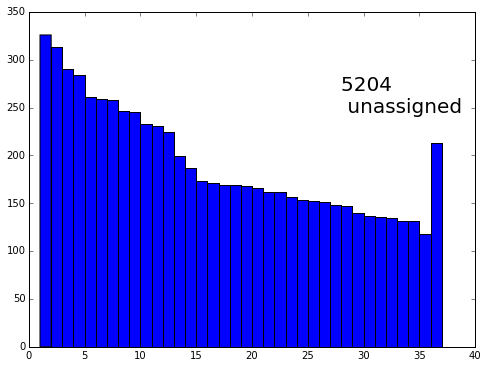

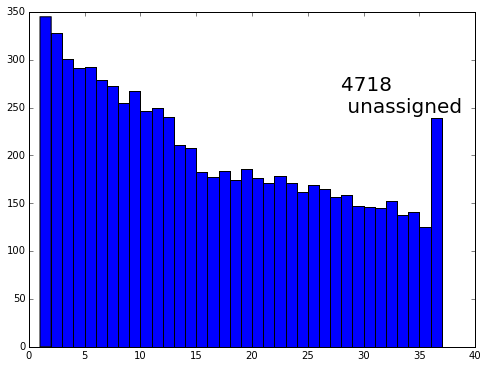

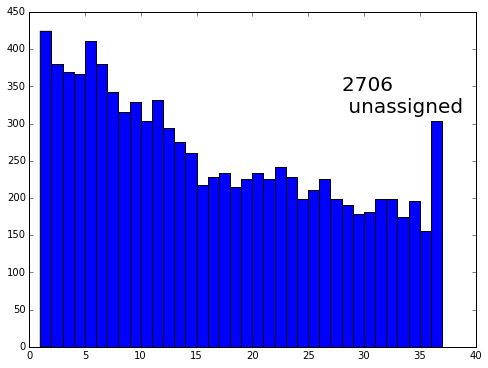

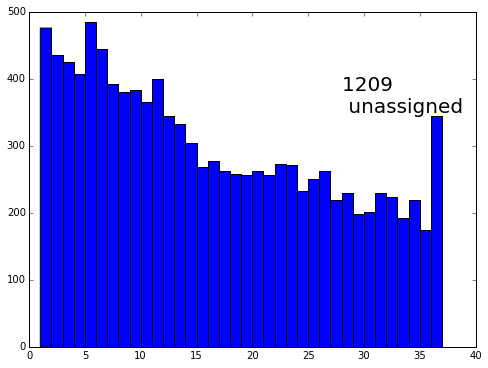

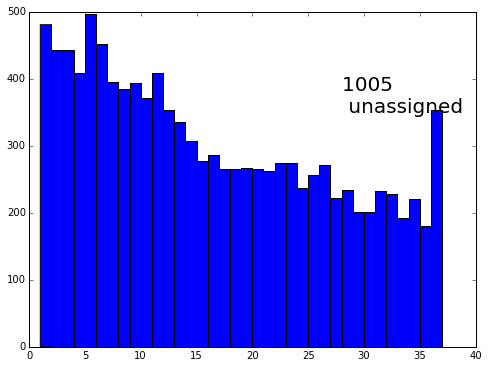

In [1]:
%matplotlib inline
import pandas as pd
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
figsize(8, 6)


#plt.scatter(x = my_map.LG, y = my_map.cM, alpha = .3, s = 30, c = 'blue')
#plt.xlim(0); plt.ylim(-5); plt.xlabel('LG',fontsize = 24); plt.ylabel("cM",fontsize = 24)
#plt.xticks(range(1, max(my_map.LG)+1), fontsize = 16)
#plt.show()


#see how the LGs form
lod10 = '/home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.inital.chromosomes'
lod8 = '/home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.lod8_singles.chromosomes'
lod7 = '/home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.lod7_singles.chromosomes'
lod6 = '/home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.lod6_singles.chromosomes'
lod5 = '/home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.lod5_singles.chromosomes'


def plot_LG_formation(grouping_file):
    LG_assignments = pd.read_csv(grouping_file, comment = "#", header = None)
    LG_assignments.columns = ['LG']
    plt.hist(LG_assignments['LG'], bins = range(1, max(LG_assignments['LG'])+1))
    plt.annotate('{} \n unassigned'.format(sum(LG_assignments['LG']==0)),  xycoords='axes fraction', xy = (.7, .7), fontsize = 20)
    plt.show()


lod10_assign = plot_LG_formation(lod10)
lod8_assign = plot_LG_formation(lod8)
lod7_assign = plot_LG_formation(lod7)
lod6_assign = plot_LG_formation(lod6)
lod5_assign = plot_LG_formation(lod5)

## Step 2
### Order and space loci within each LG 

In [ ]:
# run these commands in LEPmap
for xx in reversed(range(1,42)):
    print("java OrderMarkers /home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.lod5_singles.chromosomes \
        data=/home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.lepmap \
        alpha=1 maxDistance=30 \
        chromosome={} \
        > /home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/chr_{}.map \
        2> /home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/chr_{}.map.log\n".format(xx, xx, xx)
        )


## Step 3
### Examine map

In [33]:
import glob
import os.path
import pandas as pd

# examine raw LEPmap output 
lepmap_files = glob.glob("/home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/*.map")

LGs = []
for lep_file in lepmap_files:
    LG = os.path.basename(os.path.splitext(lep_file)[0]).split("_")[1]
    try:
        locus_positions = pd.read_csv(lep_file, sep = "\t", header = None, comment = "#", skiprows = [0,1])

    except ValueError:
        print("skipping LG: {}".format(LG))
    else:
        locus_positions['LEP_LG'] = int(LG)
        LGs.append(locus_positions)
my_map = pd.concat(LGs)
my_map.columns = ['LEPname', 'cM', 'crap', 'LEP_LG']
my_map.head()

skipping LG: 39
skipping LG: 38
skipping LG: 40
skipping LG: 41
skipping LG: 11


,LEPname,cM,crap,LEP_LG
0,4542,0.00,( 0 ),7
1,5377,3.80,( 0 ),7
2,4990,4.45,( 0 ),7
3,9278,4.45,( 0 ),7
4,8715,4.45,( 0 ),7


In [34]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
figsize(16, 12)

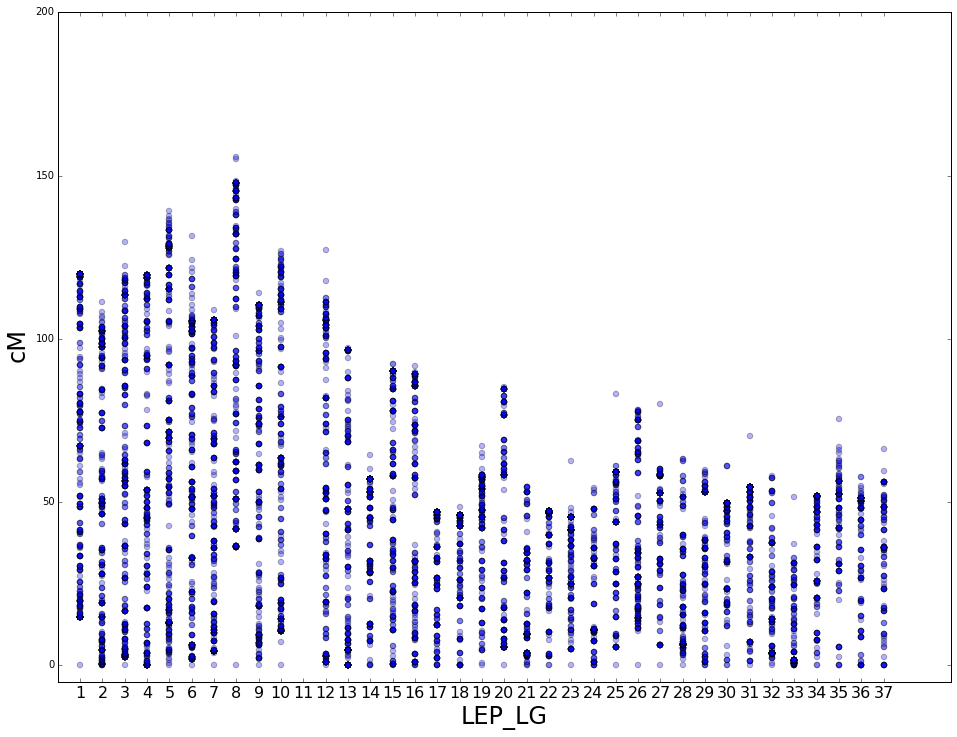

In [35]:
plt.scatter(x = my_map.LEP_LG, y = my_map.cM, alpha = .3, s = 30, c = 'blue')
plt.xlim(0); plt.ylim(-5); plt.xlabel('LEP_LG',fontsize = 24); plt.ylabel("cM",fontsize = 24)
plt.xticks(range(1, max(my_map.LEP_LG)+1), fontsize = 16)
plt.show()

Linkage groups with large gaps may not be in optimal order;  re-run LEPmap on these LGs.  

Alternatively, a few problematic loci may be causeing any issues and could be identified and excluded.

## Find loci that are more than 20 cM away from the nearest neighbor

In [38]:
my_map = my_map.sort(['LEP_LG', 'cM'])
adjacent_diff = my_map[['LEP_LG', 'cM']].diff()
adjacent_diff.columns = ['LG_diff', 'cM_diff']
diffs = pd.concat([my_map, adjacent_diff], axis = 1)
diffs['alt_cM_diff'] = diffs['cM_diff'].shift(-1)
gaps = diffs[(diffs['cM_diff'] > 11) | (diffs['alt_cM_diff'] > 11)]
gaps

,LEPname,cM,crap,LEP_LG,LG_diff,cM_diff,alt_cM_diff
0,2373,0.00,( 0 ),1,NaN,NaN,14.69
1,10081,14.69,( 0 ),1,0,14.69,0.00
0,4924,0.00,( 0 ),8,1,-108.90,36.22
1,6280,36.22,( 0 ),8,0,36.22,0.00
131,6928,36.80,( 0 ),16,0,2.45,15.42
132,4932,52.22,( 0 ),16,0,15.42,0.00
273,7428,48.12,( 0.0106 ),23,0,1.12,14.57
274,445,62.69,( 0 ),23,0,14.57,-62.69
255,12034,61.13,( 0.0125 ),25,0,0.01,21.99
256,2489,83.12,( 0 ),25,0,21.99,-83.12


#### Re-order the LG with gaps in them

In [15]:
for xx in set(gaps['LEP_LG']):
    print("java OrderMarkers \
        /home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.lod5_singles.chromosomes \
        data=/home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.lepmap \
        alpha=.5 maxDistance=30 \
        chromosome={} \
        > /home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/chr_{}.map \
        2> /home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/chr_{}.map.log\n".format(xx, xx, xx)
        )

java OrderMarkers         /home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.lod5_singles.chromosomes         data=/home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.lepmap         alpha=.5 maxDistance=30         chromosome=1         > /home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/chr_1.map         2> /home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/chr_1.map.log

java OrderMarkers         /home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.lod5_singles.chromosomes         data=/home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.lepmap         alpha=.5 maxDistance=30         chromosome=35         > /home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/chr_35.map         2> /home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralo

### If re-ordering does fully resolve after a few tries, we can exclude (singleton) problematic loci
These usually appear as single loci placed at one end of a linkage group.

In [39]:
gaps

,LEPname,cM,crap,LEP_LG,LG_diff,cM_diff,alt_cM_diff
0,2373,0.00,( 0 ),1,NaN,NaN,14.69
1,10081,14.69,( 0 ),1,0,14.69,0.00
0,4924,0.00,( 0 ),8,1,-108.90,36.22
1,6280,36.22,( 0 ),8,0,36.22,0.00
131,6928,36.80,( 0 ),16,0,2.45,15.42
132,4932,52.22,( 0 ),16,0,15.42,0.00
273,7428,48.12,( 0.0106 ),23,0,1.12,14.57
274,445,62.69,( 0 ),23,0,14.57,-62.69
255,12034,61.13,( 0.0125 ),25,0,0.01,21.99
256,2489,83.12,( 0 ),25,0,21.99,-83.12


In [41]:
# rerun with a few markers excluded
# in LEPmap loci are referred to by their order in the input file.

# edit line below to list loci to exclude.
locus_poistions_to_exclude = [4924, 2373, 445, 2489, 5911, 5640, 1122, 9693]


# edit chromosome map file
LG_assigns_file = "/home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.lod5_singles.chromosomes"

with open(LG_assigns_file) as INFILE:
    LG_assigns_lines = INFILE.readlines()

with open(LG_assigns_file+".bak", "w") as OUTFILE:
    OUTFILE.writelines(LG_assigns_lines)

#LG_assigns_lines_iter = iter(LG_assigns_lines)
with open(LG_assigns_file, 'w') as OUTFILE:
    #write header
    for cnt, line in enumerate(LG_assigns_lines):
        if (cnt) in locus_poistions_to_exclude:
            OUTFILE.write("0\n")
        else:
            OUTFILE.write(line)

## re-order run LG with excluded loci 

In [ ]:
for xx in unique(gaps['LG']):
    print("java OrderMarkers \
        /home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.lod5_singles.chromosomes \
        data=/home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed_loci.lepmap \
        alpha=.5 maxDistance=30 \
        chromosome={} \
        > /home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/chr_{}.map \
        2> /home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/chr_{}.map.log\n".format(xx, xx, xx)
        )

## Step 4
### Format output for later use.

As LEPmap uses integers (1:num loci) to refer to the loci on the linkage map, we will need to translate these back to meaningful names.

### example format

LG|locus|cM
--|-----|--
4|40123|27.3



In [55]:
my_map= my_map[['LEP_LG', 'LEPname', 'cM']]
my_map.head()

,LEP_LG,LEPname,cM
0,1,10535,0.00
1,1,8365,4.55
2,1,9605,4.55
3,1,4270,4.55
4,1,5674,4.55


In [56]:
my_map.to_csv('/home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/collapsed.linkagemap', 
              sep = "\t", index = False)